* Change xlsx format to csv





In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive to access and save files
drive.mount('/content/gdrive')

# Read the Excel file into a DataFrame
df = pd.read_excel('/content/gdrive/My Drive/ChurnEcommerce/Datasets/E Commerce Dataset.xlsx')

# Save the DataFrame to a CSV file
df.to_csv('/content/gdrive/My Drive/ChurnEcommerce/Datasets/dataset1.csv', index=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


* Delete rows with at least one empty field
* Delete unused columns

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive to access and save files
drive.mount('/content/gdrive')

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/gdrive/My Drive/ChurnEcommerce/Datasets/dataset1.csv')

# Select only the desired columns
selected_columns = ['Churn', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat',
                     'SatisfactionScore', 'Complain', 'CouponUsed', 'OrderCount', 'CashbackAmount']

df_cleaned = df[selected_columns]

# Drop rows with at least one empty value
df_cleaned = df_cleaned.dropna()

# Save the cleaned dataset back to a CSV file
df_cleaned.to_csv('/content/gdrive/My Drive/ChurnEcommerce/Datasets/dataset.csv', index=False)

print(df_cleaned)

* Split data to train, validation and test.
* Use the stratify parameter in the train_test_split function, which ensures that the distribution of labels is similar in the train and validation/test sets.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive

# Mount Google Drive to access and save files
drive.mount('/content/gdrive')

# Load your dataset
dataset_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/dataset.csv'
df = pd.read_csv(dataset_path)

# Drop rows with missing values
df = df.dropna()

# Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into train and temporary (validation + test) sets
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Split the temporary set into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Save the train, validation, and test sets to new CSV files
train_set_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/train_set.csv'
validation_set_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/validation_set.csv'
test_set_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/test_set.csv'

# Add the 'Churn' column to the train set
X_train_temp['Churn'] = y_train_temp
X_train_temp.to_csv(train_set_path, index=False)

# Add the 'Churn' column to the validation set
X_validation['Churn'] = y_validation
X_validation.to_csv(validation_set_path, index=False)

# Add the 'Churn' column to the test set
X_test['Churn'] = y_test
X_test.to_csv(test_set_path, index=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


* Logistic Regression Training

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
import os
from google.colab import drive

# Mount Google Drive to access and save files
drive.mount('/content/gdrive')

# Load datasets
train_data_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/train_set.csv'
validation_data_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/validation_set.csv'

train_data = pd.read_csv(train_data_path)
validation_data = pd.read_csv(validation_data_path)

# Separate features and target variable for training
X_train = train_data.drop('Churn', axis=1)
y_train = train_data['Churn']

# Separate features and target variable for validation
X_val = validation_data.drop('Churn', axis=1)
y_val = validation_data['Churn']

# Convert categorical variables to dummy/indicator variables
X_train = pd.get_dummies(X_train, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat'])
X_val = pd.get_dummies(X_val, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat'])

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)  # Include random_state for reproducibility
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")

# Save the trained model
model_directory = '/content/gdrive/My Drive/ChurnEcommerce/TrainedModels/'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

model_filename = os.path.join(model_directory, 'logistic_regression_model.joblib')
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Validation Accuracy: 0.83088954056696
Model saved to /content/gdrive/My Drive/ChurnEcommerce/TrainedModels/logistic_regression_model.joblib


* Logistic Regression Predictions

In [ ]:
import pandas as pd
import joblib
from google.colab import drive
import os

# Mount Google Drive to access and save files
drive.mount('/content/gdrive')

test_data_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/test_set.csv'
test_data = pd.read_csv(test_data_path)

# Load the trained model
model_directory = '/content/gdrive/My Drive/ChurnEcommerce/TrainedModels/'
model_filename = 'logistic_regression_model.joblib'
model_path = os.path.join(model_directory, model_filename)

# Load the trained model
loaded_model = joblib.load(model_path)

# Prepare the test set
X_test = test_data.drop('Churn', axis=1)
X_test = pd.get_dummies(X_test, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat'])

# Make predictions on the test set
y_test_pred = loaded_model.predict(X_test)

# Save predictions to a new 'prediction_lr' column in the test set
test_data['prediction_lr'] = y_test_pred

# Save the updated test set with predictions
updated_test_data_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/updated_test_set_lr.csv'
test_data.to_csv(updated_test_data_path, index=False)

print(f"Predictions saved to {updated_test_data_path}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Predictions saved to /content/gdrive/My Drive/ChurnEcommerce/Datasets/updated_test_set_lr.csv


* Neural Network Training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import joblib
import os
from google.colab import drive

# Mount Google Drive to access and save files
drive.mount('/content/gdrive')

# Load datasets
train_data_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/train_set.csv'
validation_data_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/validation_set.csv'

train_data = pd.read_csv(train_data_path)
validation_data = pd.read_csv(validation_data_path)

# Combine train and validation sets for training
combined_data = pd.concat([train_data, validation_data], ignore_index=True)

# Separate features and target variable
X = combined_data.drop('Churn', axis=1)
y = combined_data['Churn']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Build a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the neural network
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))

# Make predictions on the validation set
y_val_pred_proba = model.predict(X_val_scaled)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")

# Save the trained model
model_directory = '/content/gdrive/My Drive/ChurnEcommerce/TrainedModels/'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

model_filename = os.path.join(model_directory, 'neural_network_model.h5')
model.save(model_filename)

print(f"Model saved to {model_filename}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch 1/10
103/103 [==============================] - 1s 4ms/step - loss: 0.4410 - accuracy: 0.8176 - val_loss: 0.4055 - val_accuracy: 0.8376
Epoch 2/10
103/103 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8365 - val_loss: 0.4038 - val_accuracy: 0.8413
Epoch 3/10
103/103 [==============================] - 0s 3ms/step - loss: 0.3871 - accuracy: 0.8414 - val_loss: 0.4017 - val_accuracy: 0.8474
Epoch 4/10
103/103 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8454 - val_loss: 0.4010 - val_accuracy: 0.8388
Epoch 5/10
103/103 [==============================] - 0s 3ms/step - loss: 0.3708 - accuracy: 0.8475 - val_loss: 0.4075 - val_accuracy: 0.8278
Epoch 6/10
103/103 [==============================] - 0s 3ms/step - loss: 0.3650 - accuracy: 0.8503 - val_loss: 0.4038 - val_accuracy: 0.8413
Epoch 7/10
103/10

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* Neural Network Predictions

In [ ]:
import pandas as pd
from google.colab import drive
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Mount Google Drive to access and save files
drive.mount('/content/gdrive')

# Load the test set
test_data_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/test_set.csv'
test_data = pd.read_csv(test_data_path)

# Load the trained neural network model
model_directory = '/content/gdrive/My Drive/ChurnEcommerce/TrainedModels/'
model_filename = 'neural_network_model.h5'
model_path = os.path.join(model_directory, model_filename)

# Load the trained model
loaded_model = load_model(model_path)

# Prepare the test set
X_test = test_data.drop('Churn', axis=1)
X_test = pd.get_dummies(X_test, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat'])

# Standardize numerical features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Make predictions on the test set
y_test_pred_proba = loaded_model.predict(X_test_scaled)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

# Save predictions to a new 'prediction_nn' column in the test set
test_data['prediction_nn'] = y_test_pred

# Save the updated test set with predictions
updated_test_data_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/updated_test_set_nn.csv'
test_data.to_csv(updated_test_data_path, index=False)

print(f"Predictions saved to {updated_test_data_path}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
32/32 [==============================] - 0s 2ms/step
Predictions saved to /content/gdrive/My Drive/ChurnEcommerce/Datasets/updated_test_set_nn.csv


* Merge Prediction CSVs

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive to access and save files
drive.mount('/content/gdrive')

# Load the first CSV file
file1 = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/updated_test_set_lr.csv'
df1 = pd.read_csv(file1)

# Load the second CSV file
file2 = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/updated_test_set_nn.csv'
df2 = pd.read_csv(file2)

# Merge the dataframes on common columns
merged_df = pd.merge(df1, df2, on=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'Complain', 'CouponUsed', 'OrderCount', 'CashbackAmount', 'Churn'])

# Save the merged dataframe to a new CSV file
merged_df.to_csv('/content/gdrive/My Drive/ChurnEcommerce/Datasets/merged_predictions.csv', index=False)

Mounted at /content/gdrive


* Classification Reports

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Load the merged CSV file
merged_file = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/merged_predictions.csv'
merged_df = pd.read_csv(merged_file)

# Compare prediction_lr with Churn
confusion_lr = confusion_matrix(merged_df['Churn'], merged_df['prediction_lr'])
report_lr = classification_report(merged_df['Churn'], merged_df['prediction_lr'])

# Compare prediction_nn with Churn
confusion_nn = confusion_matrix(merged_df['Churn'], merged_df['prediction_nn'])
report_nn = classification_report(merged_df['Churn'], merged_df['prediction_nn'])

# Display results for prediction_lr
print("Results for prediction_lr:")
print("Confusion Matrix:")
print(confusion_lr)
print("\nClassification Report:")
print(report_lr)

# Display results for prediction_nn
print("\nResults for prediction_nn:")
print("Confusion Matrix:")
print(confusion_nn)
print("\nClassification Report:")
print(report_nn)

Results for prediction_lr:
Confusion Matrix:
[[875  18]
 [159  34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       893
           1       0.65      0.18      0.28       193

    accuracy                           0.84      1086
   macro avg       0.75      0.58      0.59      1086
weighted avg       0.81      0.84      0.80      1086


Results for prediction_nn:
Confusion Matrix:
[[866  27]
 [141  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       893
           1       0.66      0.27      0.38       193

    accuracy                           0.85      1086
   macro avg       0.76      0.62      0.65      1086
weighted avg       0.82      0.85      0.82      1086



* Confusion Matrix

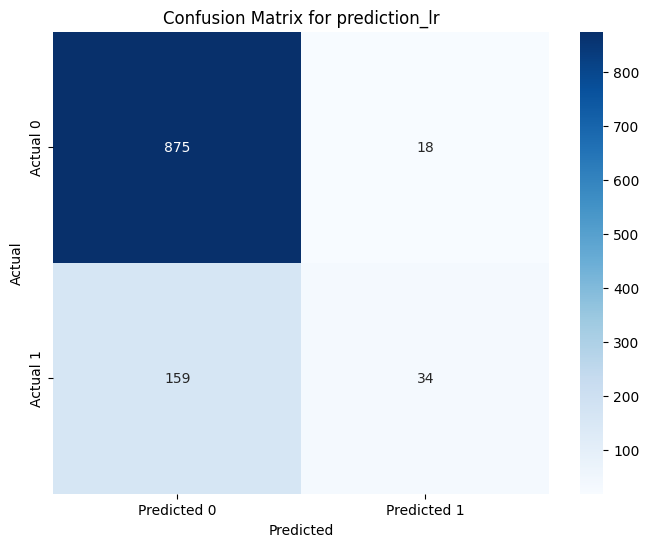

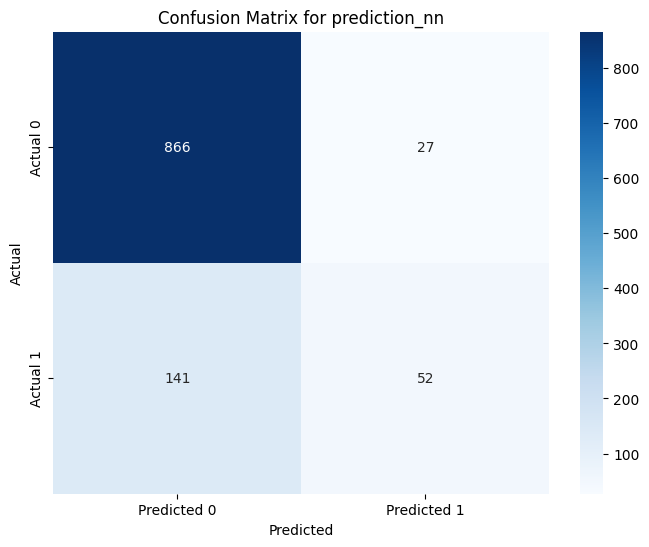

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the merged CSV file
merged_file = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/merged_predictions.csv'
merged_df = pd.read_csv(merged_file)

# Create confusion matrix for prediction_lr
confusion_lr = confusion_matrix(merged_df['Churn'], merged_df['prediction_lr'])

# Create a heatmap for prediction_lr
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for prediction_lr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create confusion matrix for prediction_nn
confusion_nn = confusion_matrix(merged_df['Churn'], merged_df['prediction_nn'])

# Create a heatmap for prediction_nn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for prediction_nn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* Charts

<Figure size 1000x600 with 0 Axes>

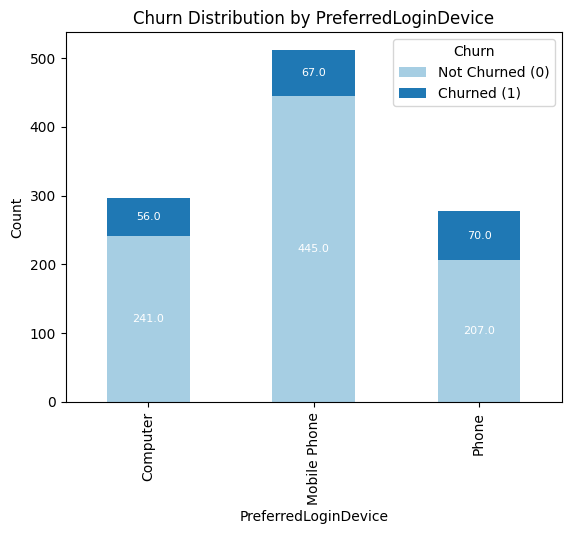

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/gdrive/My Drive/ChurnEcommerce/Datasets/merged_predictions.csv"
df = pd.read_csv(file_path)

# Set Seaborn color palette
sns.set_palette("Paired")

# Create a bar chart
plt.figure(figsize=(10, 6))

# Count the occurrences of churn for each PreferredLoginDevice category
churn_counts = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack()

# Plot the bar chart
ax = churn_counts.plot(kind='bar', stacked=True)
plt.title('Churn Distribution by PreferredLoginDevice')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])

# Add numbers on each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

plt.show()


<Figure size 1000x600 with 0 Axes>

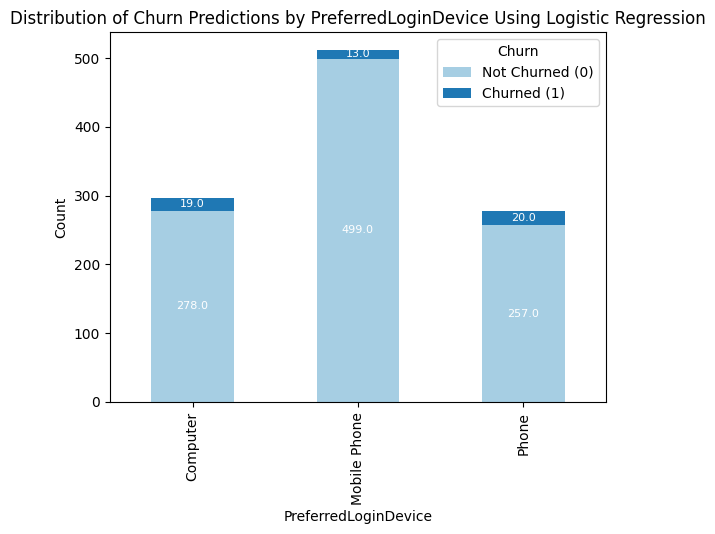

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/gdrive/My Drive/ChurnEcommerce/Datasets/merged_predictions.csv"
df = pd.read_csv(file_path)

# Set Seaborn color palette
sns.set_palette("Paired")

# Create a bar chart
plt.figure(figsize=(10, 6))

# Count the occurrences of churn for each PreferredLoginDevice category
churn_counts = df.groupby(['PreferredLoginDevice', 'prediction_lr']).size().unstack()

# Plot the bar chart
ax = churn_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Churn Predictions by PreferredLoginDevice Using Logistic Regression')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])

# Add numbers on each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

plt.show()

<Figure size 1000x600 with 0 Axes>

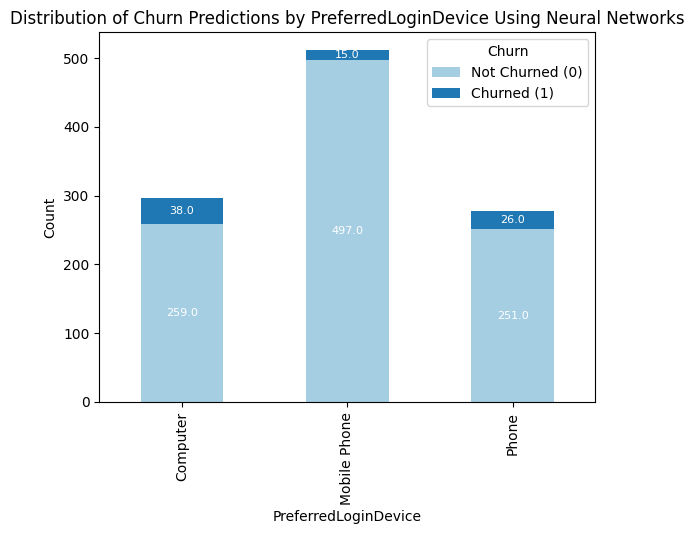

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/gdrive/My Drive/ChurnEcommerce/Datasets/merged_predictions.csv"
df = pd.read_csv(file_path)

# Set Seaborn color palette
sns.set_palette("Paired")

# Create a bar chart
plt.figure(figsize=(10, 6))

# Count the occurrences of churn for each PreferredLoginDevice category
churn_counts = df.groupby(['PreferredLoginDevice', 'prediction_nn']).size().unstack()

# Plot the bar chart
ax = churn_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Churn Predictions by PreferredLoginDevice Using Neural Networks')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])

# Add numbers on each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

plt.show()

* Churn Rates by categorical variables

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive to access and save files
drive.mount('/content/gdrive')

# Load the dataset
file_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/merged_predictions.csv'
df = pd.read_csv(file_path)

# Check the first few rows of the dataset to understand its structure
print(df.head())

# Check the unique values in the 'Gender' column
print(df['PreferedOrderCat'].unique())

# Calculate churn rates by gender
churn_by_gender = df.groupby('PreferedOrderCat')['Churn'].mean()

# Display the result
print(churn_by_gender)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
  PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0         Mobile Phone          Credit Card    Male  Laptop & Accessory   
1         Mobile Phone             E wallet    Male  Laptop & Accessory   
2         Mobile Phone             E wallet  Female  Laptop & Accessory   
3         Mobile Phone             E wallet  Female  Laptop & Accessory   
4         Mobile Phone             E wallet  Female  Laptop & Accessory   

   SatisfactionScore  Complain  CouponUsed  OrderCount  CashbackAmount  Churn  \
0                  5         0         5.0         8.0          178.77      0   
1                  1         1         0.0         1.0          154.41      0   
2                  3         0         2.0         2.0          192.12      0   
3                  3         0         2.0         2.0          192.12      0   
4            

* Churn Rates by numerical variables

  PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0         Mobile Phone          Credit Card    Male  Laptop & Accessory   
1         Mobile Phone             E wallet    Male  Laptop & Accessory   
2         Mobile Phone             E wallet  Female  Laptop & Accessory   
3         Mobile Phone             E wallet  Female  Laptop & Accessory   
4         Mobile Phone             E wallet  Female  Laptop & Accessory   

   SatisfactionScore  Complain  CouponUsed  OrderCount  CashbackAmount  Churn  \
0                  5         0         5.0         8.0          178.77      0   
1                  1         1         0.0         1.0          154.41      0   
2                  3         0         2.0         2.0          192.12      0   
3                  3         0         2.0         2.0          192.12      0   
4                  3         0         2.0         2.0          192.12      0   

   prediction_lr  prediction_nn  
0              0            

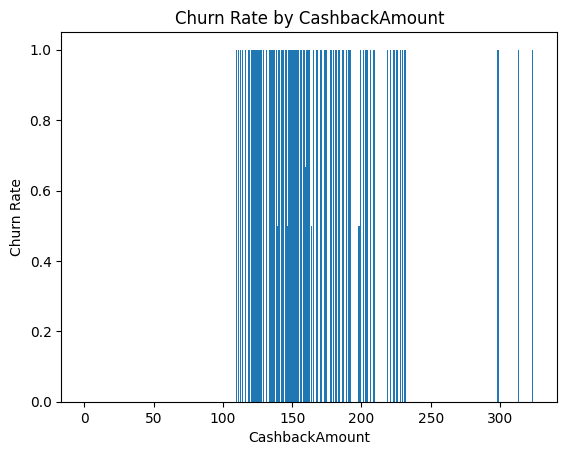

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/gdrive/My Drive/ChurnEcommerce/Datasets/merged_predictions.csv'
df = pd.read_csv(file_path)

# Check the first few rows of the dataset to understand its structure
print(df.head())

# Check the unique values in the 'Complain' column
print(df['CashbackAmount'].unique())

# Calculate churn rates by Complain
churn_by_complain = df.groupby('CashbackAmount')['Churn'].mean()

# Display the result
print(churn_by_complain)

# Plot the churn rates
plt.bar(churn_by_complain.index, churn_by_complain)
plt.xlabel('CashbackAmount')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by CashbackAmount')
plt.show()
